In [31]:
import pandas as pd
import math
import matplotlib.pyplot as plt

df = pd.read_csv("dataset .csv")
print(df)



    Smoke  Lungs Capacity Cancer
0       0              10     No
1       0              11     No
2       1              10     No
3       2               9     No
4       0               9     No
5       1               9    Yes
6       3              10     No
7       3               8    Yes
8       3               8    Yes
9       3               9     No
10      5               6    Yes
11      5               6    Yes
12      7               6    Yes
13      7               8    Yes
14      8               5    Yes


In [32]:
def euclidean_distance(smoke, lungs_capacity, smoke_test, lungs_capacity_test):
    distance = math.sqrt((smoke - smoke_test)**2 + (lungs_capacity - lungs_capacity_test)**2)
    return distance

In [33]:
def get_neighbours(smoke, lung_capacity, smoke_test, lungs_capacity_test, no_of_neighbours):
    distances = []
    for i in range(len(smoke)):
        distance = euclidean_distance(smoke[i], lung_capacity[i], smoke_test, lungs_capacity_test)
        distances.append((i, distance))

    distances.sort(key=lambda x: x[1])
    neighbours = []
    for i in range(no_of_neighbours):
        neighbours.append(distances[i][0])
    return neighbours

In [34]:
def predict_classification(smoke, lung_capacity, smoke_test, lungs_capacity_test, num):
    neighbours = get_neighbours(smoke, lung_capacity, smoke_test, lungs_capacity_test, num)

    Cancer = [df.iloc[i]['Cancer'] for i in neighbours]
    yes=0
    no=0
    for val in Cancer:
        if val.lower() == 'Yes':
            yes += 1
        elif val.lower() == 'No':
            no += 1

    if yes > no:
        return 'yes'
    elif no > yes:
        return 'no'        

    return val

In [35]:

smoke = df['Smoke'].values
lung_capacity = df['Lungs Capacity'].values
smoke_test = 5  
lungs_capacity_test = 6  
num = 3  

prediction = predict_classification(smoke, lung_capacity, smoke_test, lungs_capacity_test, num)
print("Prediction:", prediction)

Prediction: Yes


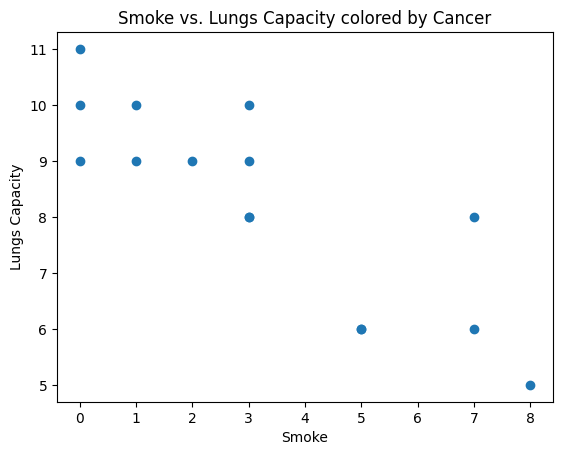

In [36]:
plt.scatter(df['Smoke'], df['Lungs Capacity'])
plt.xlabel('Smoke')
plt.ylabel('Lungs Capacity')
plt.title('Smoke vs. Lungs Capacity colored by Cancer')
plt.show()